In [9]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
import matplotlib

# What makes TikTok tick?
**Exploration of attributes that make a popular TikTok song**

*Sameerah Helal, Radhika Kulkarni, Kevin Xu, Darya Petrov*

## Motivation
* TikTok has been around for a couple years, and in that time has managed to capture a worldwide audience with its enticing songs and consumable content.
* WIth music being an important component of TikTok's short-form content, we want to investigate what makes music on TikTok  popular to current audiences? 
* We can compare features of popular TikTok songs to popular songs in the United States to estimate relationships. 

## Intention

1. Explore density of popular TikTok song features
2. Explore correlation between TikTok song features
3. Visualize relationships/trends
4. Compare TikTok songs to Top songs

## Data

Playlists: 

1. TikTok Hits by TikTok
2. Top Hits of 2019 by Spotify 
3. Top Tracks of 2020 by Spotify 
4. Top Hits of 2021 by NiCampos

Source: Spotify's API

* Created an app (141b) in our Spotify Developer Account: 
    - Client that requests access to protected resources
    - HTTPS requests in UTF-8 format to an API endpoint. 
    - Followed the 'Client Credentials' OAUTH flow from Spotify which gives us access to public song, playlist, album, artist data. The system authenticates and authorizes the app rather than a user. API gives a json format
* Parse json file and extract features → create dataframe 

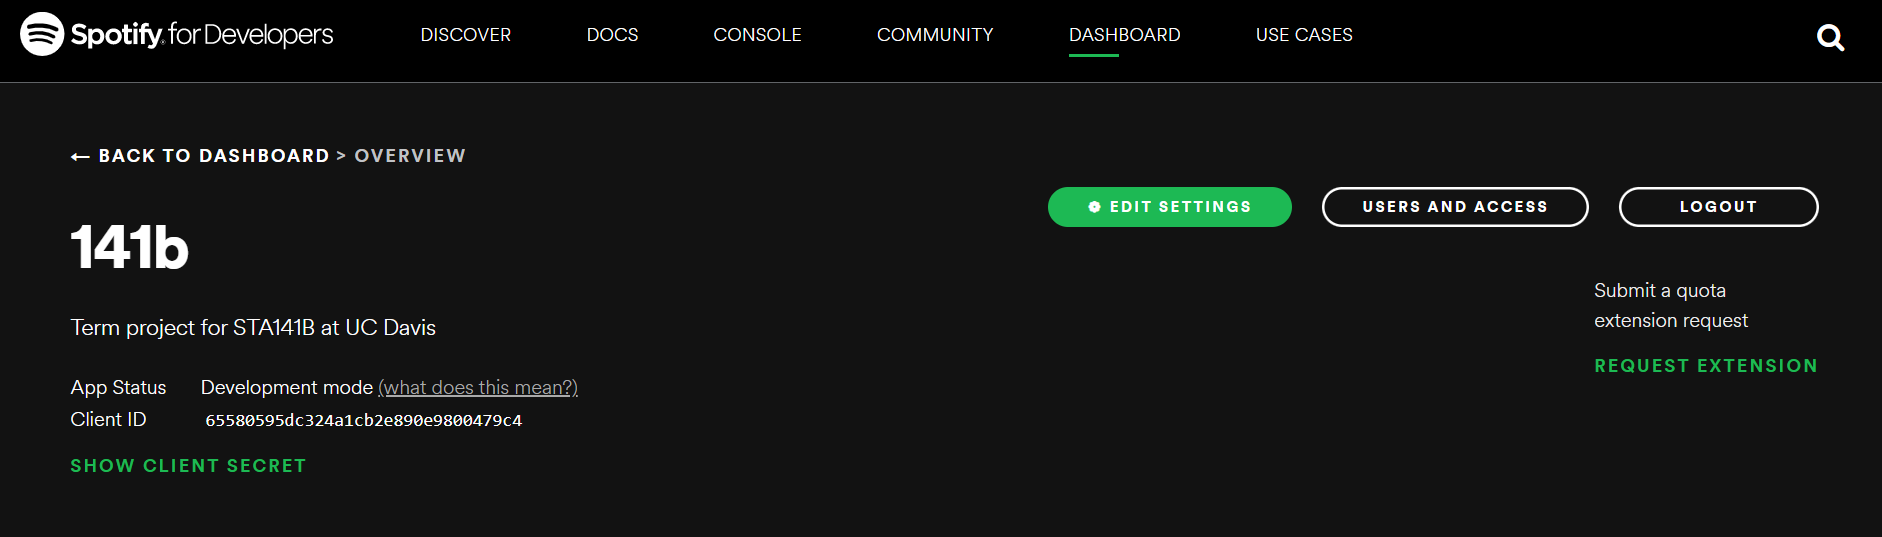

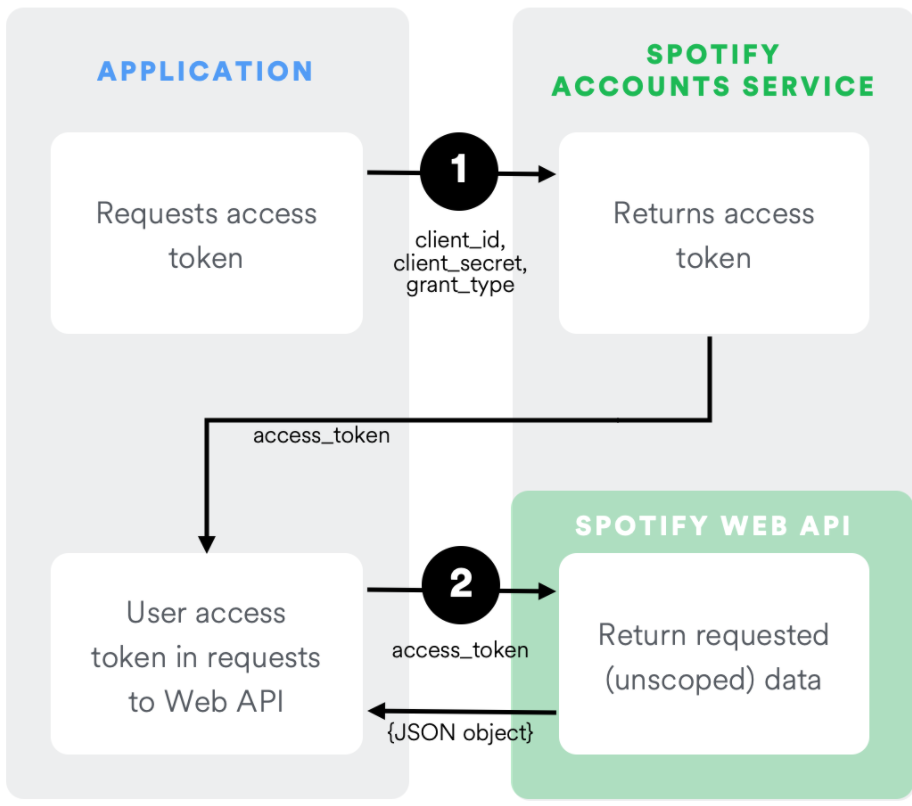

**Function that Parses the API (Sameerah)**
* perhaps include an image of unformatted JSON file

## Variable Descriptions

**id**: (string) The Spotify ID for the track.

**title**: (string) The name of the song for the track. 

**all_artists**: (string) The name of the artists for the song.

**popularity**: (int) Popularity is measured on a scale from 0-100 of how popular the song is. "[P]opularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past"

**release_date**: (string) The date on which the track was released for listening on Spotify, represented in yyyy-mm-dd format.

**danceability**: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11


**loudness**: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**acousticness**: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

**instrumentalness**: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

**tempo**: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**: (int) The duration of the track in milliseconds.

**time_signature**: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7

In [6]:
#load in data
data = pd.read_csv("TikTok_Playlist.csv")

# Reformatting Dates
data.release_date = pd.to_datetime(data.release_date)

#Scaling popularity 
data["popularity_scaled"] = data["popularity"]/100

data.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_scaled
0,5reQI13tWWYDLMrGcUF4Mk,Nuestra Canción,Vicente Garcia,83,2015-06-16,0.906,0.731,6,-7.021,0,0.426,0.000005,0.0853,0.794,106.995,260080,4,0.83
1,6M47gaKejso9772SKTa3yH,Face Off,Dwayne Johnson,81,2021-10-08,0.693,0.935,8,-4.323,1,0.180,0.000000,0.1790,0.391,80.882,219802,4,0.81
2,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,Tom Rosenthal,78,2018-10-26,0.440,0.040,3,-16.887,1,0.981,0.465000,0.1110,0.249,135.965,193749,4,0.78
3,15HMh4yxdf4wyxSZSlOgGZ,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,Moliy,88,2021-09-16,0.859,0.525,1,-8.051,0,0.434,0.000023,0.1080,0.312,110.066,204764,4,0.88
4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Adele,100,2021-10-14,0.604,0.366,5,-7.519,1,0.578,0.000000,0.1330,0.130,141.981,224695,4,1.00


In [3]:
#view overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 205 non-null    object        
 1   title              205 non-null    object        
 2   all_artists        205 non-null    object        
 3   popularity         205 non-null    int64         
 4   release_date       205 non-null    datetime64[ns]
 5   danceability       205 non-null    float64       
 6   energy             205 non-null    float64       
 7   key                205 non-null    int64         
 8   loudness           205 non-null    float64       
 9   mode               205 non-null    int64         
 10  acousticness       205 non-null    float64       
 11  instrumentalness   205 non-null    float64       
 12  liveness           205 non-null    float64       
 13  valence            205 non-null    float64       
 14  tempo     

In [4]:
#subsetting variables that are interpretable when scaled to 0 to 1
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence',"popularity_scaled"]
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#bae1ff',"#D5D6EA"]
facetdf01 = pd.melt(data, id_vars=['id'], value_vars=quant01)

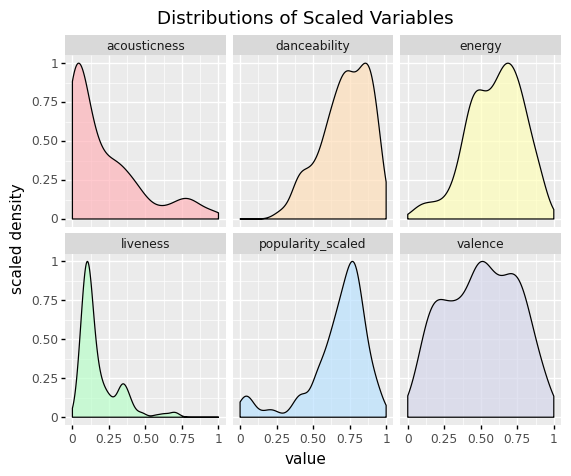

<ggplot: (8790685110155)>

In [29]:
# Plot 1: Distributions of Scaled Variables
gg = p9.ggplot(facetdf01, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7, show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of Scaled Variables")
gg += p9.labels.ylab("scaled density")
gg

<AxesSubplot:>

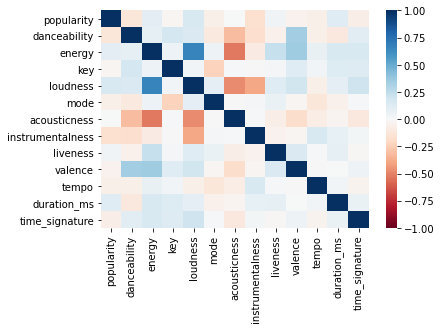

In [20]:
# Plot 2: Heat Map/ Correlation Matrix 

ryb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
corr = data.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)
sns.heatmap(data.drop("popularity_scaled",axis=1).corr(), vmin = -1, vmax = 1, cmap = 'RdBu')

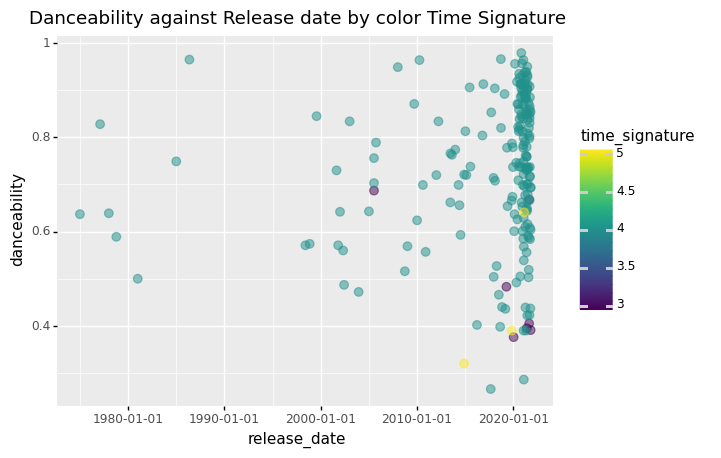

<ggplot: (8790682932935)>

In [22]:
# Plot 3: Danceability against Release date by color Time Signature

plot3 = p9.ggplot(data, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot3 += p9.geom_count(alpha = 0.5, size = 3)
plot3 += p9.ggtitle('Danceability against Release date by color Time Signature')
plot3

# <center> <h1>***Fin*** </h1> </center>